Zadanie 1

In [28]:
import numpy as np
from random import randint
from time import time
import matplotlib.pyplot as plt

In [29]:
def scale(M):

    n, m = M.shape

    for i in range(n):
        max_i = max(M[i], key=abs)
        for j in range(m):
            M[i][j] /= max_i            
    
    return M



def solve(Matrix):
    
    Matrix = Matrix.astype('float64')

    Matrix = scale(Matrix)

    n = Matrix.shape[0]

    for i in range(n):

        #partial pivoting
        maxi = i
        for j in range(i,n):
            if abs(Matrix[j,i]) > abs(Matrix[maxi,i]):
                maxi = j
        if i != maxi:
            Matrix[maxi], Matrix[i] = Matrix[i], Matrix[maxi].copy()


        #Gauss-Jordan
        for j in range(n):
            if i != j:
                Matrix[j] -= (Matrix[j,i] / Matrix[i,i]) * Matrix[i]


    A=Matrix[:,:-1]
    B = Matrix[:,-1]

    result = np.divide(B, np.diag(A))

    for i in range(n):
        if abs(result[i]) < 10e-9:
            result[i] = 0

    return result



Przed przystąpieniem do metody Gaussa-Jordana macierz zostaje przeskalowana - każdy element każdego wiersza jest podzielony przez maksimum.
W kolejnym kroku dla każdej kolumny znajduję element największy i zamiam wiersze, tak aby dla i-tego wiersza wystąpił max(i-tej kolumny) (partial pivoting). 
Metoda Gaussa-Jordana polega na wyzerowaniu wszystkich elementów w kolumnie, z wyjątkiem tego na diagonali - element[i][i]. Przed zwróceniem wyniku przybliżam wartości bliskie zero do 0, gdyż prawdopodobnie są one równe 0, lecz ich niedokładność może wynikać z działań na liczbach zmiennoprzecinkowych.

In [30]:
#solving with library function


def solve_lib(Matrix):

    A=Matrix[:,:-1]
    B = Matrix[:,-1]
    
    result = np.linalg.solve(A,B)
    return result

def compare_results(result1, result2):
    if len(result2)!=len(result1):
        return False

    return np.allclose(result1,result2)



In [31]:


def generate_random_matrix(n):
    matrix = [[randint(0,100) for _ in range(n)] for _ in range(n-1)]
    return np.asarray(matrix)




def calc_time(func):
    start = time()
    res = func()
    end = time()
    return end-start, res

def compare_results(result1, result2):
    if len(result2)!=len(result1):
        return False
    return np.allclose(result1,result2)


if __name__=="__main__":

    n = 10
    size = 501
    step = 20
    i = 0

    sizes = []
    time_lib = []
    time_manual = []


    while( i < n):

        A = generate_random_matrix(size)
        time1, res1 =calc_time(lambda: solve(A))
        time2, res2 =calc_time(lambda: solve_lib(A))

        if not compare_results(res1,res2):
            raise Exception("results are not equal")
            
        time_manual.append(time1)
        time_lib.append(time2)

        sizes.append(size)

        size += step
        i += 1





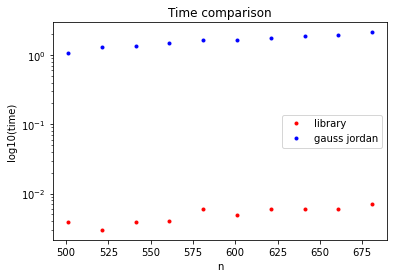

In [32]:

plt.plot(sizes,time_lib, color='r',linewidth=0,label='library', marker='.')
plt.plot(sizes,time_manual, color='b',linewidth=0,label='gauss jordan', marker='.')
plt.yscale('log')
plt.title('Time comparison')
plt.xlabel('n')
plt.ylabel('log10(time)')
plt.legend()
plt.show()

Wykonuję algorytm dla 10 macierzy rzędu 501 do 681. Przy sprawdzaniu poprawności otrzymanego rezultatu, porównuję go z funkcją biblioteczną numpy.linalg.solve(). 
Wykres przedstawia porównanie czasu rozwiązywania układu równań metodą Gaussa-Jordana oraz wyżej wymienionej funkcji. Czasy różnią się o kilka rzędów wielkości na korzyść funkcji bibliotecznej.
W przypadku porównywania czasów wybranej funkcji w zależności od n, ta różnica nie jest już tak znacząca.
